In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
fd = pd.read_csv("List of Countries by Sugarcane Production-Copy1.csv")

In [24]:
fd.shape

(103, 7)

In [25]:
fd.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# 1.Data Cleaning

## removing "," & "." 

In [26]:
fd["Production (Tons)"] = fd["Production (Tons)"].str.replace( "." , "")
fd["Production per Person (Kg)"] = fd["Production per Person (Kg)"].str.replace( "." , "").str.replace( "," , "")
fd["Acreage (Hectare)"] = fd["Acreage (Hectare)"].str.replace( "." , "")
fd["Yield (Kg / Hectare)"] = fd["Yield (Kg / Hectare)"].str.replace( "." , "").str.replace( "," , "")

In [27]:
fd.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [28]:
fd.drop("Unnamed: 0",axis = 1 , inplace = True)

In [29]:
fd.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


## rename column name to deal them easy

In [44]:
fd.rename(columns = {"Production per Person (Kg)" : "Production_per_Person_(Kg)","Production (Tons)" : "Production(Tons)",
                    "Acreage (Hectare)" : "Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg / Hectare)"},inplace = True)

## dropping null values

In [45]:
fd.isna().sum()

Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield(Kg / Hectare)           1
dtype: int64

In [47]:
fd[fd["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [50]:
fd.dropna(inplace = True)

In [51]:
fd

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,435965
98,Lebanon,Asia,97,16,3,283864
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,119498


## changing the Data types 

In [53]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     102 non-null    object
 1   Continent                   102 non-null    object
 2   Production(Tons)            102 non-null    object
 3   Production_per_Person_(Kg)  102 non-null    object
 4   Acreage(Hectare)            102 non-null    object
 5   Yield(Kg / Hectare)         102 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [57]:
fd["Production(Tons)"] = fd["Production(Tons)"].astype("float")
fd["Production_per_Person_(Kg)"] = fd["Production_per_Person_(Kg)"].astype("float")
fd["Acreage(Hectare)"] = fd["Acreage(Hectare)"].astype("float")
fd["Yield(Kg / Hectare)"] = fd["Yield(Kg / Hectare)"].astype("float")

In [58]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     102 non-null    object 
 1   Continent                   102 non-null    object 
 2   Production(Tons)            102 non-null    float64
 3   Production_per_Person_(Kg)  102 non-null    float64
 4   Acreage(Hectare)            102 non-null    float64
 5   Yield(Kg / Hectare)         102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.6+ KB


In [59]:
fd.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Acreage(Hectare)              101
Yield(Kg / Hectare)           102
dtype: int64

# 2.Univarite Analysis

## How many countries produce sugarcane from each continent?

In [60]:
fd.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [61]:
fd["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='count'>

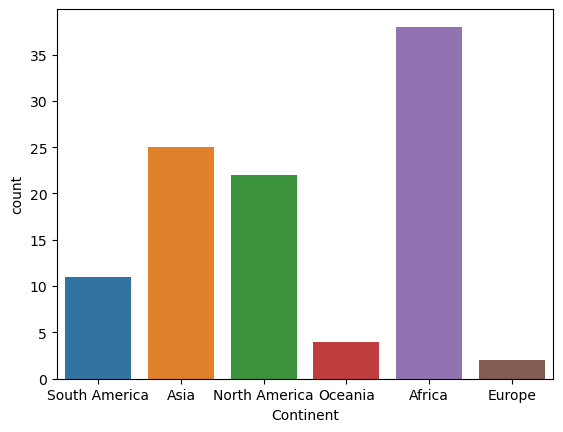

In [65]:
sns.countplot(data = fd, x = "Continent")

## Checking outliers

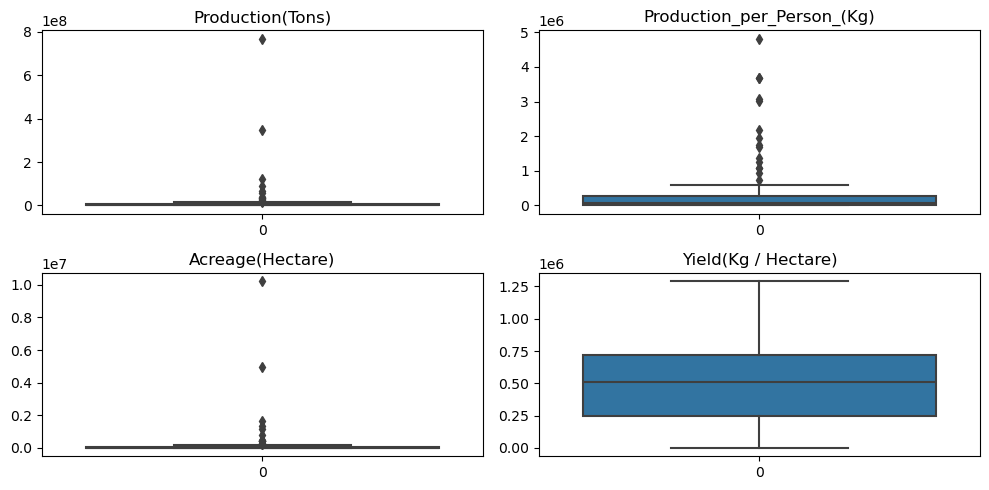

In [73]:
plt.figure(figsize = (10,5),layout = "tight")
plt.subplot(2,2,1)
sns.boxplot(fd["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(fd["Production_per_Person_(Kg)"])
plt.title("Production_per_Person_(Kg)")
plt.subplot(2,2,3)
sns.boxplot(fd["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(fd["Yield(Kg / Hectare)"])
plt.title("Yield(Kg / Hectare)")
plt.show()

## Distribution of the columns

C:\Users\raghu\AppData\Local\Temp\ipykernel_12712\2487298556.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fd["Production(Tons)"])
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raghu\AppData\Local\Temp\ipykernel_12712\2487298556.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

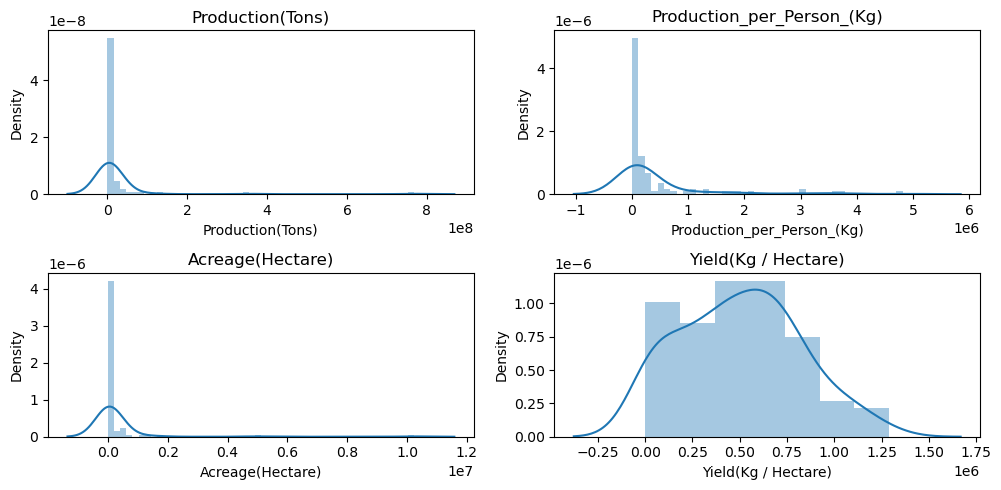

In [74]:
plt.figure(figsize = (10,5),layout = "tight")
plt.subplot(2,2,1)
sns.distplot(fd["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(fd["Production_per_Person_(Kg)"])
plt.title("Production_per_Person_(Kg)")
plt.subplot(2,2,3)
sns.distplot(fd["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(fd["Yield(Kg / Hectare)"])
plt.title("Yield(Kg / Hectare)")
plt.show()

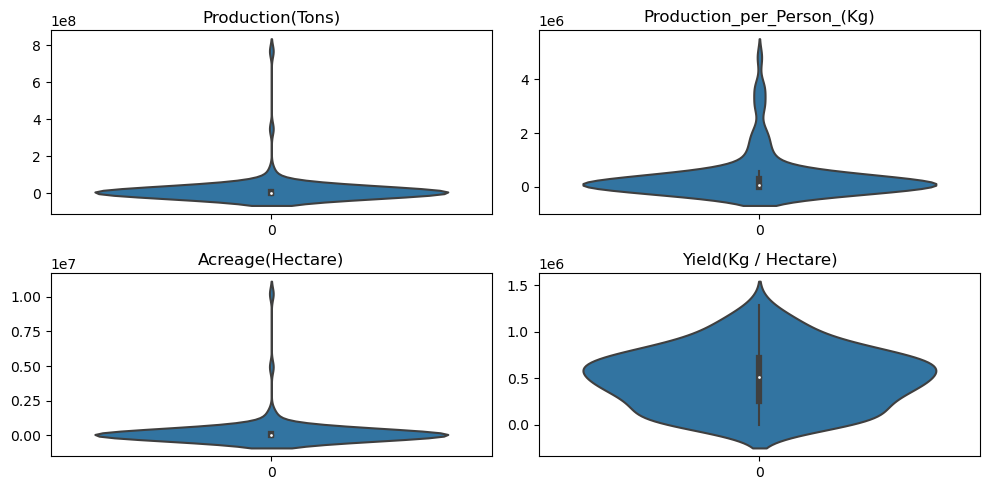

In [75]:
plt.figure(figsize = (10,5),layout = "tight")
plt.subplot(2,2,1)
sns.violinplot(fd["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.violinplot(fd["Production_per_Person_(Kg)"])
plt.title("Production_per_Person_(Kg)")
plt.subplot(2,2,3)
sns.violinplot(fd["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.violinplot(fd["Yield(Kg / Hectare)"])
plt.title("Yield(Kg / Hectare)")
plt.show()

# 3. Bivarite Analysis

In [76]:
fd.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [110]:
fd_new = fd[["Country","Production(Tons)"]]

In [111]:
fd_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
100,Singapore,50.0
101,Samoa,12.0


In [112]:
fd_new["Production_percentage"] = (fd_new["Production(Tons)"]*100 )/ (fd_new["Production(Tons)"].sum())

C:\Users\raghu\AppData\Local\Temp\ipykernel_12712\2089578288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_new["Production_percentage"] = (fd_new["Production(Tons)"]*100 )/ (fd_new["Production(Tons)"].sum())


In [113]:
fd_new

,Country,Production(Tons),Production_percentage
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
100,Singapore,50.0,2.649176e-06
101,Samoa,12.0,6.358022e-07


In [1]:
fd_new["Production_percentage"].head(10).plot(kind = "pie",autopct = "%.2f")

NameError: name 'fd_new' is not defined

<Axes: xlabel='Country'>

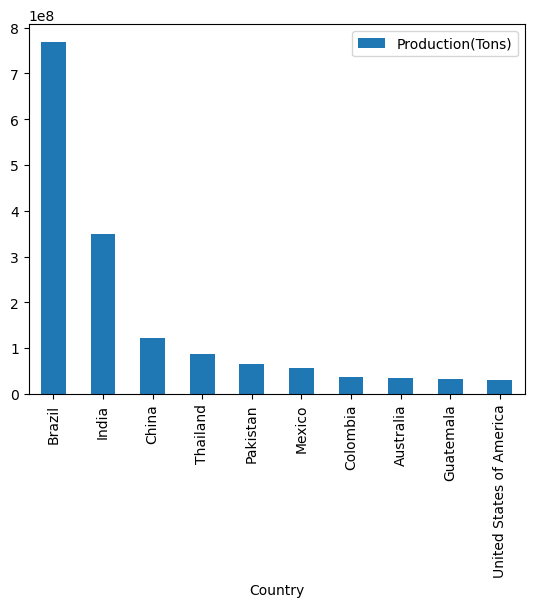

In [131]:
fd[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)",ascending = False).head(10).plot(kind = "bar")

<Axes: xlabel='Country'>

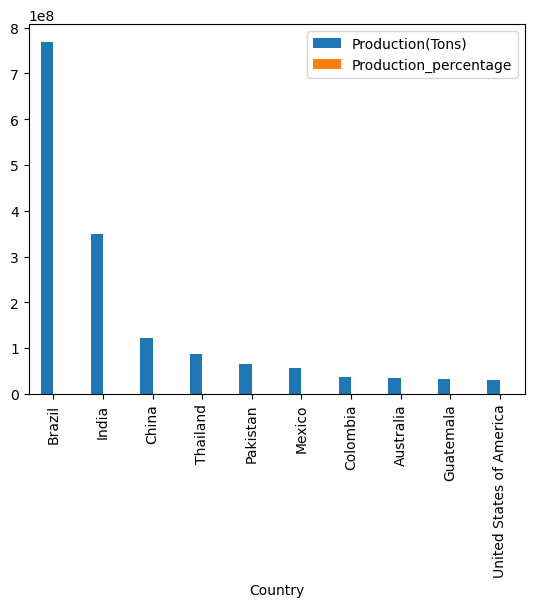

In [134]:
fd_new.set_index("Country").sort_values("Production(Tons)",ascending = False).head(10).plot(kind = "bar")

In [137]:
fd_new.set_index("Country",inplace = True)

In [148]:
fd

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.0,9.0,435965.0
98,Lebanon,Asia,97.0,16.0,3.0,283864.0
100,Singapore,Asia,50.0,9.0,2.0,25.0
101,Samoa,Oceania,12.0,6.0,1.0,119498.0


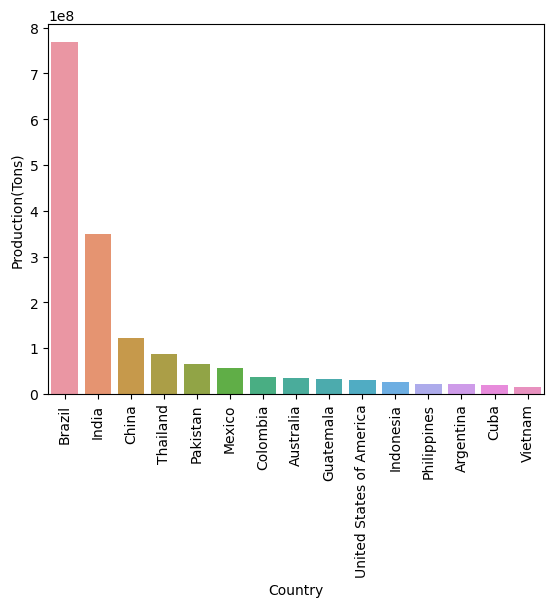

In [156]:
ax = sns.barplot(data = fd.head(15) , x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Which country has highest land?

In [157]:
fd.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


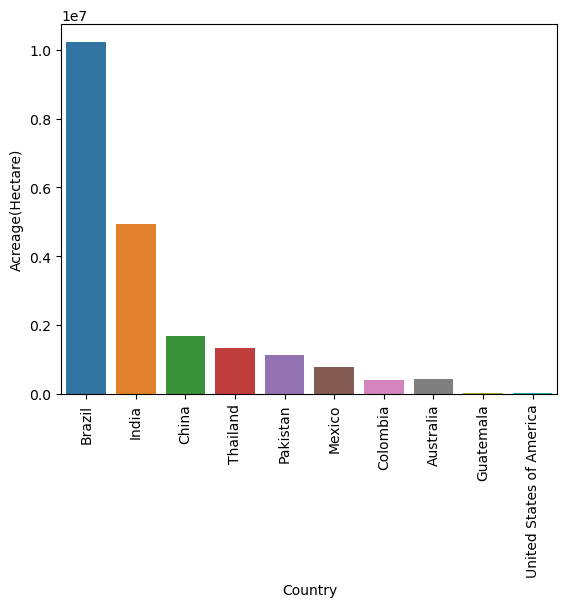

In [186]:



ax2 = sns.barplot(data = fd.head(10),x = "Country" , y = "Acreage(Hectare)")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.show(ax1,ax2)

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

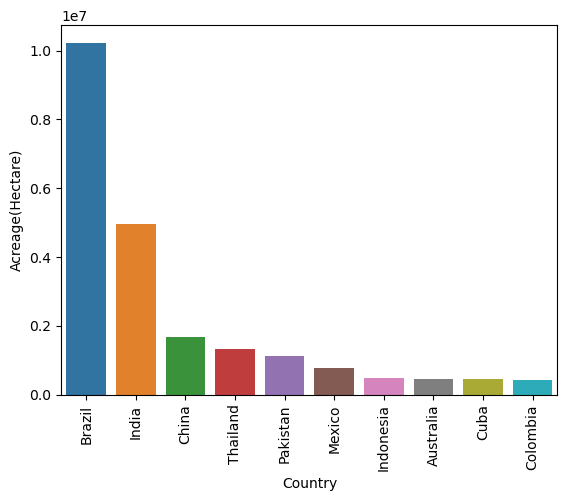

In [185]:
ax1= sns.barplot(data = fd.sort_values("Acreage(Hectare)",ascending = False).head(10),x = "Country" , y = "Acreage(Hectare)")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

## Which country has highest yield per hectare?

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

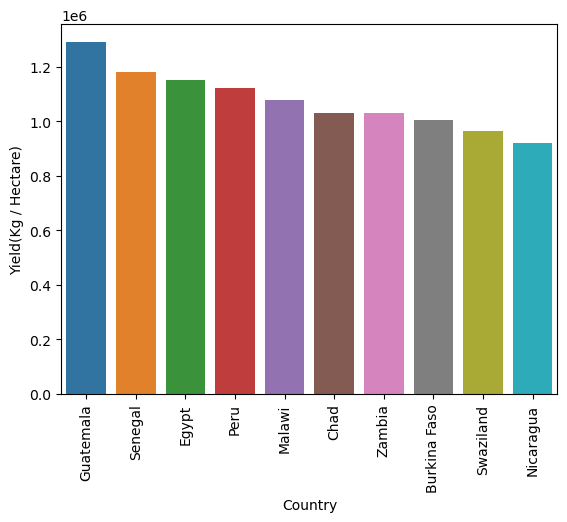

In [166]:
ax = sns.barplot(data = fd.sort_values( "Yield(Kg / Hectare)", ascending = False).head(10),x = "Country",y ="Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Correlation

In [188]:
fd.corr(numeric_only = True)

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production_per_Person_(Kg),0.352369,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg / Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: xlabel='Production_per_Person_(Kg)', ylabel='Production(Tons)'>

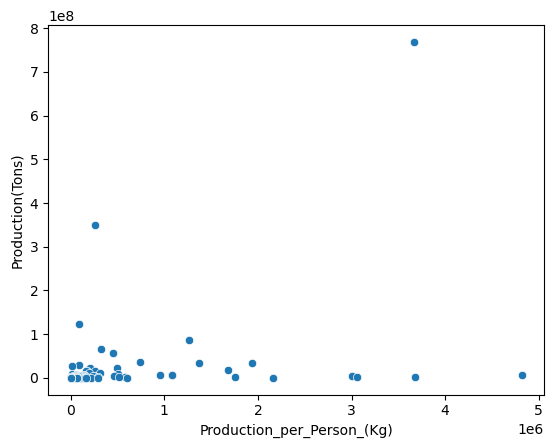

In [190]:
sns.scatterplot(data = fd , y = "Production(Tons)" , x = "Production_per_Person_(Kg)")

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

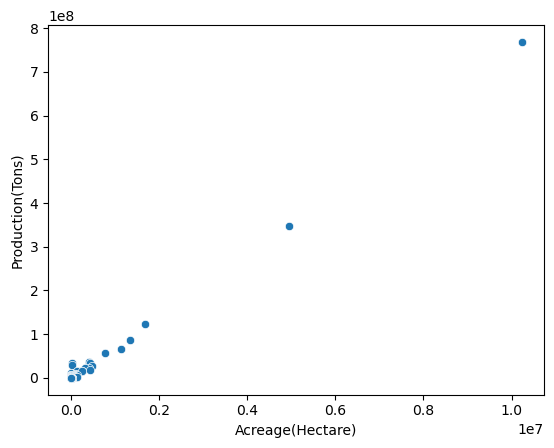

In [191]:
sns.scatterplot(data = fd , y = "Production(Tons)" , x = "Acreage(Hectare)")

## Production in Continent

In [205]:
fd2 = fd.groupby("Continent").count()["Country"]

<Axes: xlabel='Continent', ylabel='count'>

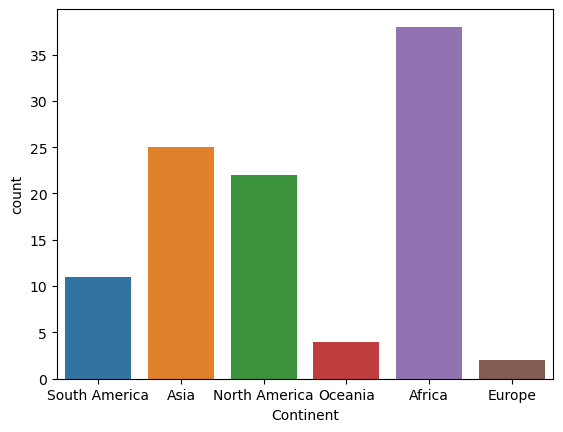

In [208]:
sns.countplot(data = fd , x = "Continent" )

<Axes: xlabel='Continent', ylabel='Production(Tons)'>

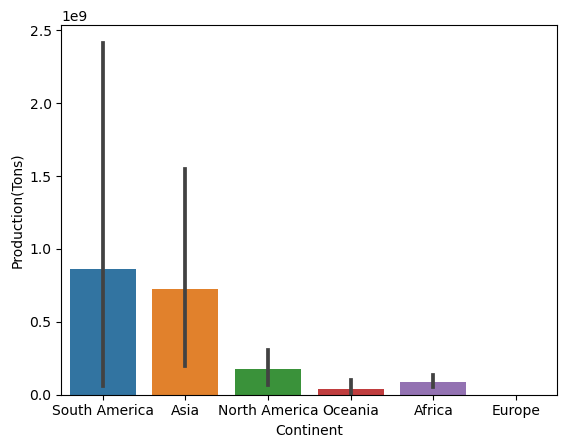

In [210]:
sns.barplot(data = fd , x = "Continent" ,y = "Production(Tons)",estimator = "sum")

C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

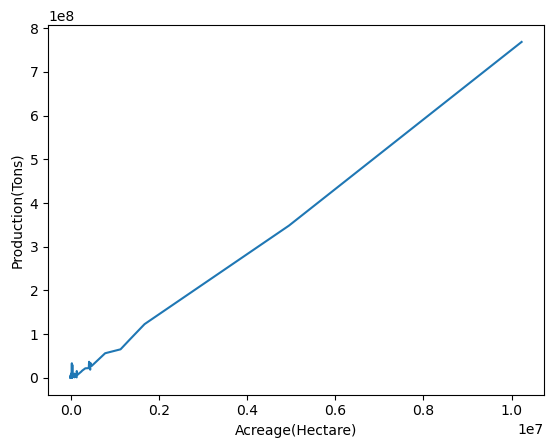

In [211]:
sns.lineplot(data = fd , x = "Acreage(Hectare)" ,y = "Production(Tons)")